In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
from keras.layers import Conv2D,Flatten,MaxPooling2D,Dense
from keras.models import Sequential
import glob,os,random

In [3]:
base_path ='./trash_div7612/dataset-resized'

In [4]:
img_list = glob.glob(os.path.join(base_path,'*/*.jpg'))

In [5]:
print(len(img_list))

2527


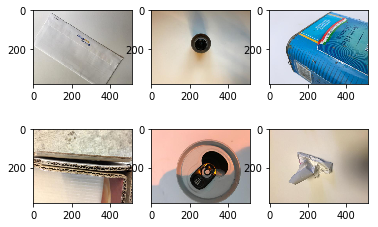

In [6]:
for i,img_path in enumerate(random.sample(img_list,6)):
    img = load_img(img_path)
    img = img_to_array(img,dtype=np.uint8)
    
    plt.subplot(2,3,i+1)
    plt.imshow(img.squeeze())

In [7]:
train_datagen = ImageDataGenerator(
    rescale =1./225,shear_range=0.1,zoom_range=0.1,
    width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,
    vertical_flip=True,validation_split=0.1)

test_datagen = ImageDataGenerator(
    rescale=1./255,validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    base_path,target_size=(300,300),batch_size=16,
    class_mode='categorical',subset='training',seed=0)

validation_generator = test_datagen.flow_from_directory(
    base_path,target_size=(300,300),batch_size=16,
    class_mode='categorical',subset='training',seed=0)

labels = (train_generator.class_indices)
labels = dict((v,k)for k,v in labels.items())
print(labels)

Found 2276 images belonging to 6 classes.
Found 2276 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [8]:
# 建模和训练
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [10]:
model.fit_generator(train_generator, epochs=100, steps_per_epoch=2276//32,validation_data=validation_generator,
                    validation_steps=251//32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
71/71 [==============================] - 90s 1s/step - loss: 1.7142 - acc: 0.2393 - val_loss: 1.4326 - val_acc: 0.2411
Epoch 2/100
71/71 [==============================] - 92s 1s/step - loss: 1.5322 - acc: 0.3662 - val_loss: 1.2489 - val_acc: 0.4286
Epoch 3/100
71/71 [==============================] - 93s 1s/step - loss: 1.3834 - acc: 0.4288 - val_loss: 1.0932 - val_acc: 0.5179
Epoch 4/100
71/71 [==============================] - 95s 1s/step - loss: 1.4249 - acc: 0.4058 - val_loss: 1.3809 - val_acc: 0.5446
Epoch 5/100
71/71 [==============================] - 96s 1s/step - loss: 1.3267 - acc: 0.4626 - val_loss: 1.3330 - val_acc: 0.4911
Epoch 6/100
71/71 [==============================] - 97s 1s/step - loss: 1.3032 - acc: 0.4771 - val_loss: 0.9275 - val_acc: 0.4821
Epoch 7/100
71/71 [==============================] - 96s 1s/step - loss: 1.2484 - acc: 0.5009 - val_loss: 1.2209 - val_acc: 0.4911
Epoch 8/100
71/71 [================

Epoch 61/100
71/71 [==============================] - 112s 2s/step - loss: 0.5073 - acc: 0.8107 - val_loss: 0.3628 - val_acc: 0.8929
Epoch 62/100
71/71 [==============================] - 119s 2s/step - loss: 0.4865 - acc: 0.8238 - val_loss: 0.6573 - val_acc: 0.7500
Epoch 63/100
71/71 [==============================] - 109s 2s/step - loss: 0.5356 - acc: 0.7945 - val_loss: 0.2218 - val_acc: 0.7946
Epoch 64/100
71/71 [==============================] - 110s 2s/step - loss: 0.5217 - acc: 0.8081 - val_loss: 1.1755 - val_acc: 0.7500
Epoch 65/100
71/71 [==============================] - 109s 2s/step - loss: 0.4311 - acc: 0.8415 - val_loss: 0.3069 - val_acc: 0.8929
Epoch 66/100
71/71 [==============================] - 107s 2s/step - loss: 0.5215 - acc: 0.8231 - val_loss: 0.6226 - val_acc: 0.8036
Epoch 67/100
71/71 [==============================] - 107s 2s/step - loss: 0.4485 - acc: 0.8247 - val_loss: 0.3826 - val_acc: 0.8571
Epoch 68/100
71/71 [==============================] - 111s 2s/step - 

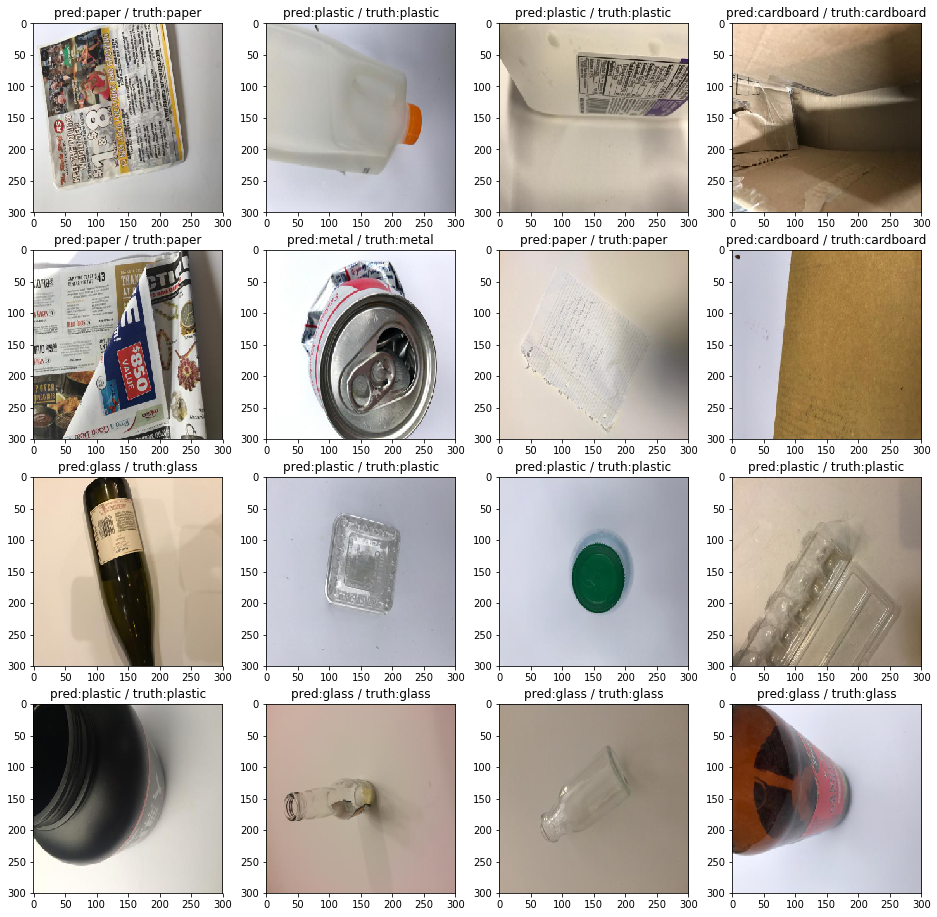

In [11]:
# 结果预测
test_x,test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.title('pred:%s / truth:%s'%(labels[np.argmax(preds[i])],labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])